In [1]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
dic = pkl.load( open ('/users/global/cornkle/C_paper/wavelet/saves/bulk_10big.p', 'rb')) #MSG_TRMM_temp_pcp_300px2004-2013_new.p', 'rb'))

In [3]:
_p=np.array(dic['pmax']) # 98th perc per MCS
_t=np.array(dic['tmin'])  #mean T
_clat = np.array(dic['clat'])
_area = np.array(dic['area'])*25
_isfin = np.array(dic['isfin'])
_po30 = np.array(dic['po30'])
_perc = np.array(dic['pperc'])
#_lon = np.array(dic['lonmax'])
print('Number MCSs:', _p.size)

Number MCSs: 22346


In [4]:
pthresh = 200
pthresh2 = 0.1
athresh = 1500000
p = _p[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
t = _t[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
area = _area[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
po30 = _po30[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]

In [5]:
print(np.sum(po30))
print(np.percentile(_perc[_perc>0.1], 99))
print('Number MCSs:', p.size)

37896
29.4976899905
Number MCSs: 13152


In [6]:
bins=list(range(-80, -9, 1))   # compute probability per temperature range (1degC) 
ppo30=np.where(p > 30)  
to30=t[ppo30]   

H1, bins1 = np.histogram(to30, bins=bins, range=(t.min(), t.max()))
H, bins = np.histogram(t, bins=bins, range=(t.min(), t.max()))
H=H.astype(float)
H1=H1.astype(float)
histo=H1/H*100.
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

In [7]:
H, xedges, yedges = np.histogram2d(t, p, bins=(25, 25))
hh = (H / np.sum(H))*100.
np.sum(hh)

100.0

In [8]:
sort = np.argsort(area)
sarea = area.copy()[sort]
st = t.copy()[sort]
sp = p.copy()[sort]

In [9]:
inds = np.array(np.arange(len(area)))
np.random.shuffle(inds.flat)
rarea = area.copy()[inds]
rt = t.copy()[inds]
rp = p.copy()[inds]

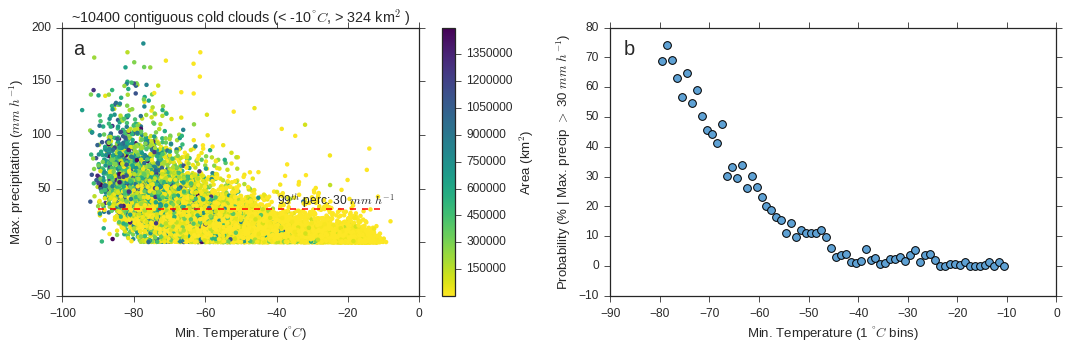

In [12]:
path = '/users/global/cornkle/C_paper/wavelet/figs/'
fig = plt.figure(figsize=(15, 5), dpi=400)
cc=0.8
ax1 = fig.add_subplot(121)
xy = np.vstack([p,t])
z = gaussian_kde(xy)(xy)
test = rarea # z / (z.max() - z.min()) #sarea #z / (z.max() - z.min())
mappable = ax1.scatter(rt, rp, c=test, edgecolor='', cmap='viridis_r') # viridis_r
ax1.set_title('~10400 contiguous cold clouds (< -10$^{\degree}C$, > 324 km$^2$ )')
ax1.set_ylabel('Max. precipitation ($mm\ h^{-1}$)')
ax1.set_xlabel('Min. Temperature ($^{\degree}C$)')
ax1.hlines(31, -90, -10, linestyles='dashed', label='99$^{th}$ percentile', linewidth=1.5, color='red')
text(-40, 34, '99$^{th}$ perc: 30 $mm\ h^{-1}$',  fontsize=12)

cbar = fig.colorbar(mappable)
cbar.set_label('Area (km$^2$)')
text(0.03, 0.9, 'a', transform=ax1.transAxes, fontsize=20)
######################

ax1 = fig.add_subplot(122)
ax1.scatter(center, histo, marker="o",color='#5ea1d4', s=60, zorder=2, edgecolor = 'black', linewidth=1)
ax1.set_xlabel('Min. Temperature (1 $^{\degree}C$ bins)')
ax1.set_ylabel('Probability (% | Max. precip $>$ 30 $mm\ h^{-1}$)') 
text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=20)

plt.tight_layout()
plt.savefig(path+'scatter-10_gt324.png')
plt.savefig(path+'scatter-10_gt324.eps')